# Exercise 4.9 Part 2

# Part 2 contains the following. 
1.	Import my most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).
2.	Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
3.	You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
4.	The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
5.	Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)
6.	Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
7.	You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
8.	Export your visualizations as “.png” files in your relevant project folder.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\Python Fundamentals for Data Analysts 4\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Tim\\Desktop\\Data Analytics Intro\\Python Fundamentals for Data Analysts 4\\Instacart Basket Analysis'

In [8]:
instacart_project = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

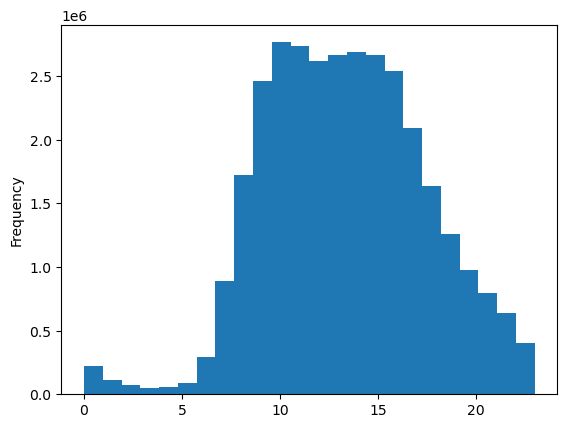

In [9]:
hist = instacart_project['order_hour_of_day'].plot.hist(bins = 24)

The histogram demonstrated would be the pick hour of the day when customers place orders. Moreover, the shape of the histogram shows that there is a pattern of order within a specific hour of the day. It is an indication that orders do occur around a particular time though, a skewed distribution pattern might indicate that an order pattern does occur outside of the busy hours like the early morning, afternoon or evening period. 

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

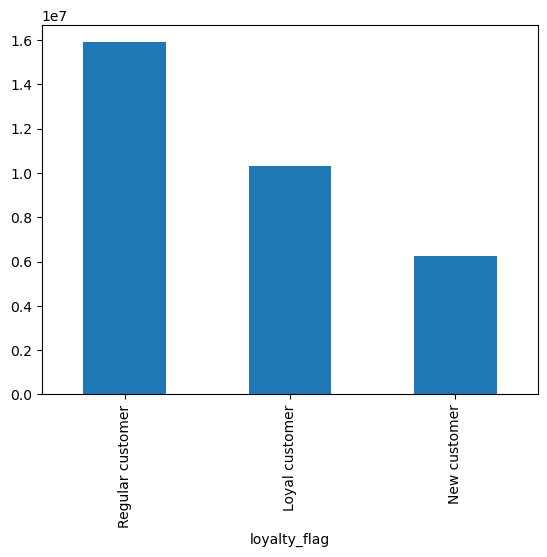

In [10]:
bar = instacart_project['loyalty_flag'].value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [11]:
# Create a random sample by generating a seed
np.random.seed(4)

In [12]:
# Create a dev list based on the data split of (70/30)
dev = np.random.rand(len(instacart_project)) <= 0.7

In [13]:
# Split the dataframe into two samples
big = instacart_project[dev]
small = instacart_project[~dev]

In [14]:
# Compare the dataframe length to the sum of the big and small samples
len(instacart_project)

32434212

In [15]:
len(big) + len(small)

32434212

In [16]:
# Reduce the samples to only the columns needed
instacart_project_2 = small [['order_hour_of_day','prices']]

In [17]:
# Check if the subset of the sample was made properly
instacart_project_2.head(5)

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


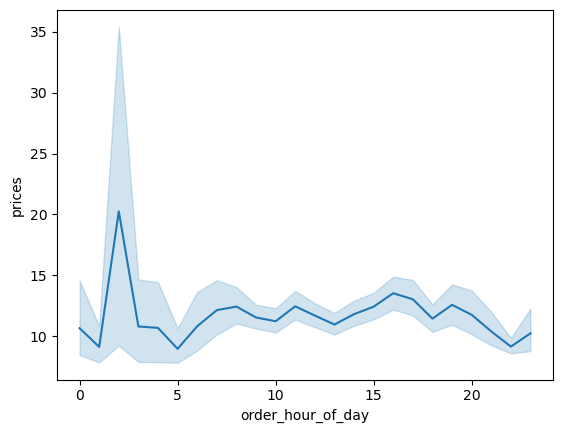

In [18]:
# Create a line chart
line = sns.lineplot(data = instacart_project_2, x = 'order_hour_of_day',y = 'prices')

# 6. Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [19]:
# Reduce previously made sample to only the columns needed
instacart_project_3 = small [['age','n_dependants']]

In [20]:
# Check if the subset of the sample was made properly
instacart_project_3.head(5)

,age,n_dependants
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


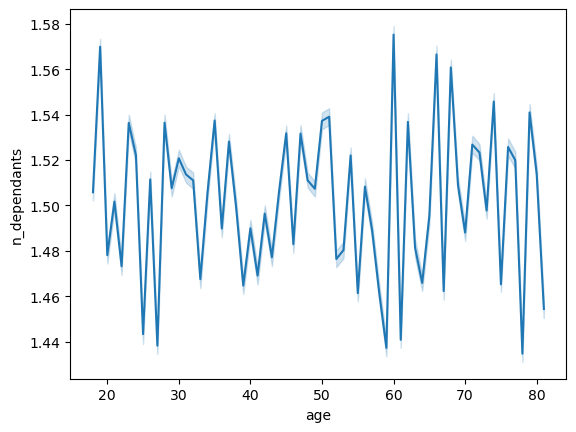

In [25]:
# Create a line chart
line_chart = sns.lineplot(data = instacart_project_3, x = 'age',y = 'n_dependants')

The line chart graph did not show a strong relationship between the age and number of dependents as the graph line is not consistent with its movement as age increases. 

# 7. Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [26]:
# Reduce previously made sample to only the columns needed
instacart_project_4 = small [['age','income']]

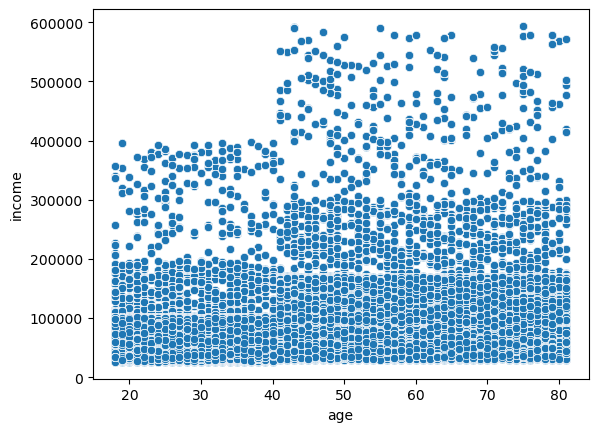

In [27]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = instacart_project_4)

The income range of 20,000 and below was mostly recorded for all age categories. Above 20,000 income brackets were noticed among the older age categories which suggests that as one ages, the income increases. Moreover, there was more concentration for individuals over 40 and above on the income scale compared to individuals under 40. However, to determine any correlations between the variables will require more analysis to determine their significant level. 

# 8. Export your visualizations as “.png” files in your relevant project folder.

In [29]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'hist_order_hour_of_day_frequency.png'))

In [30]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'loyalty_flag_distribution.png'))

In [31]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'change_in_price_over_hours_of_the_day.png'))

In [32]:
line_chart.figure.savefig(os.path.join(path, '04 Analysis', 'age_vs_n_dependants.png'))

In [33]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'change_in_spending_power_over_age.png'))